In [1]:
import torch
import matplotlib.pyplot as plt
from collections import OrderedDict
import os 

from  utils import sample_from_gen_PatchByPatch_test
from models import generators



In [2]:
def load_G(state_dict_G,netG):
    new_state_dict_G = OrderedDict()

    for k, v in state_dict_G.items():
        if 'module' in k:
            k = k.replace('module.','')
        new_state_dict_G[k] = v
        
    netG.load_state_dict(new_state_dict_G)
    _=netG.eval()
    return netG


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


filename = 'results/241_lp_BN_replicate_outerpadding_nlg6_nld4_padzstochastic_v2/300_150.pth'

checkpoint = torch.load(filename,map_location='cpu')

args = checkpoint['args']
state_dict_G = checkpoint['netG_state_dict']   


netG = generators.ResidualPatchGenerator(z_dim = args.z_dim,G_ch = args.G_ch,base_res=args.base_res,n_layers_G = args.n_layers_G,attention=args.attention,
                                         img_ch= args.img_ch,leak = args.leak_G,SN = False,type_norm = args.type_norm_G,map_dim = 1,
                                         padding_mode = 'local',outer_padding = args.outer_padding,
                                         num_patches_h = 3,num_patches_w=3,padding_size = 1,conv_reduction = 2).to(device)


netG = load_G(state_dict_G,netG)



(-0.5, 1023.5, 1023.5, -0.5)

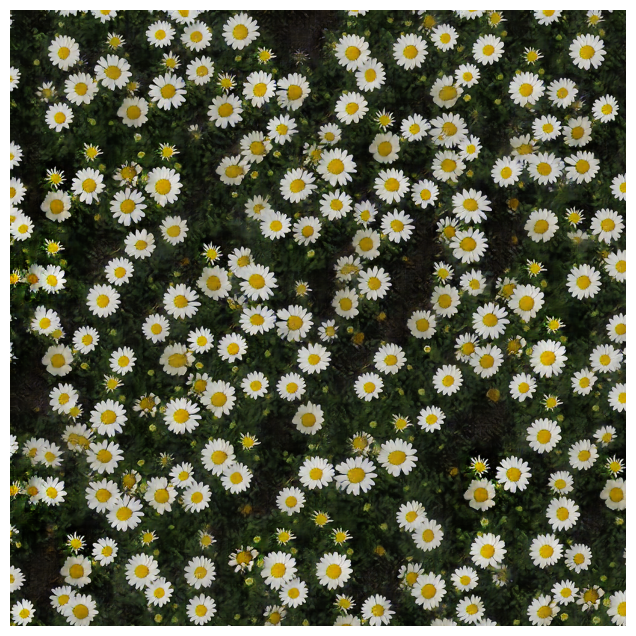

In [5]:
output_resolution_height = 1024
output_resolution_width = 1024
with torch.no_grad():
    img = sample_from_gen_PatchByPatch_test(netG,args.z_dim,num_images=1,
                                            output_resolution_height=output_resolution_height,output_resolution_width=output_resolution_width
                                            ,device=device).cpu()

mult = 0.8
fig2, axes = plt.subplots(1,1,figsize=(mult*10,mult*10))
im_np = img[0].permute(1, 2, 0).numpy()*0.5+0.5
#im_np = np.round(im_np)

plt.imshow(im_np)
axes.axis('off')